In [12]:
def getMaxColor(file):
    img = cv2.imread(file)
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # 105, 53
        
    # detect case when  the colormap color is less than 127
    maxColor = 0
    for i in imgray:
        if sum(i) > 0 and maxColor < max(i):
            maxColor = max(i)

    return maxColor

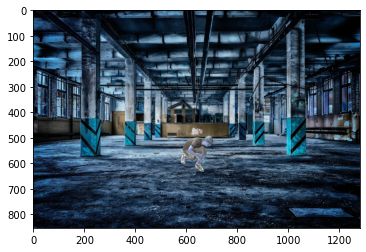

In [13]:
# 참고: https:\\\\daeunginfo.blogspot.com\\2019\\05\\opencv-python-roi_28.html

import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import xml.etree.cElementTree as ET
from PIL import Image

home_directory = 'C:\\Users\\Jisu\\Desktop\\synthesis'
background_directory_parent = os.path.join(home_directory, 'background')
character_directory_parent = os.path.join(home_directory, 'character')
output_directory = os.path.join(home_directory, 'output')

for background_file in os.listdir(background_directory_parent):
    background = cv2.imread(os.path.join(background_directory_parent, background_file))
        
    for character_file in os.listdir(character_directory_parent):
        if 'img.png' in character_file:
            character_directory = os.path.join(character_directory_parent, character_file)
            character_layer_directory = os.path.join(character_directory_parent, character_file[:-7] + 'layer.png')
                        
            maxColor = getMaxColor(character_layer_directory)

            character = cv2.imread(character_directory)
            character_layer= cv2.imread(character_layer_directory)

            # mask_inv 참고: https://blog.kakaocdn.net/dn/uKRsJ/btqGHq5Utgd/vD1rEaopihCKEi9MPQP3PK/img.png
            character_layer_gray = cv2.cvtColor(character_layer, cv2.COLOR_BGR2GRAY)
            _, mask_inv = cv2.threshold(character_layer_gray, maxColor-1, maxColor, cv2.THRESH_BINARY_INV)           
        
            # get roi for background
            background_height, background_width, _ = background.shape # 284, 284, 3
            character_height, character_width, _ = character.shape # 512, 512, 3

            x = (background_height - character_height) // 2 # /2의 몫만 가져옴 (정수만 가져오기 위해)
            y = (background_width - character_width) // 2

            roi = background[x: x+character_height, y: y+character_width]
            roi_character = cv2.add(character_layer, roi, mask=mask_inv)
            result = cv2.add(roi_character, character)
            
            background[x: x+character_height, y: y+character_width] = result

            if not os.path.exists(os.path.join('D:\\Unity\\1128_human\\captures', 'result_val_position_fix_512')):
                os.makedirs(os.path.join('D:\\Unity\\1128_human\\captures', 'result_val_position_fix_512'))
            
            cv2.imwrite(os.path.join(output_directory, background_file[:-4]+'_'+character_file[:-7]+'synthesis'+'.png'), result)
